In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:
import matplotlib.pyplot as plt

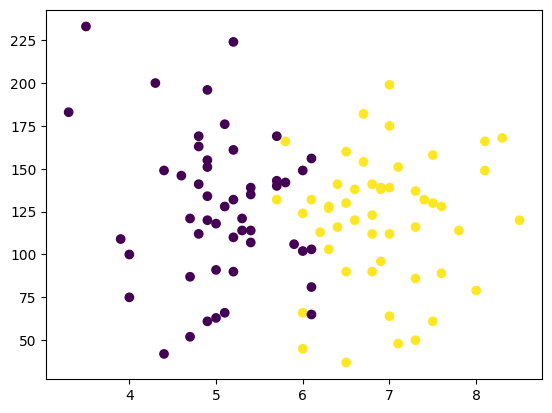

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
40,4.9,134.0
1,5.9,106.0
24,4.7,121.0
33,6.0,149.0
93,6.8,112.0
...,...,...
23,4.7,87.0
74,6.7,154.0
69,8.5,120.0
96,4.4,42.0


In [18]:
X_test

,cgpa,iq
27,6.0,124.0
17,3.3,183.0
98,6.3,103.0
92,5.2,110.0
34,4.8,163.0
52,7.0,175.0
35,6.8,90.0
76,4.9,155.0
20,6.6,120.0
25,5.0,91.0


In [19]:
Y_train

,placement
40,0
1,0
24,0
33,0
93,1
...,...
23,0
74,1
69,1
96,0


In [20]:
Y_test

,placement
27,1
17,0
98,1
92,0
34,0
52,1
35,1
76,0
20,1
25,0


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
Scalar=StandardScaler()

In [24]:
X_train=Scalar.fit_transform(X_train)

In [25]:
X_train

array([[-1.00150076,  0.27993332],
       [-0.11955293, -0.41438948],
       [-1.17789033, -0.04243084],
       [-0.03135815,  0.65189196],
       [ 0.67420012, -0.26560602],
       [-0.20774771,  1.07344509],
       [ 0.85058969,  0.40391953],
       [-0.91330598, -0.11682257],
       [ 0.05683664,  0.23033883],
       [ 0.40961577,  0.92466163],
       [-0.2959425 ,  0.23033883],
       [-1.79525381, -1.18310401],
       [-1.08969555,  1.14783682],
       [ 0.40961577,  0.18074435],
       [ 0.32142099,  0.45351402],
       [ 0.67420012,  0.45351402],
       [ 0.05683664, -1.43107643],
       [-1.00150076, -1.53026541],
       [ 1.2915636 ,  0.87506715],
       [ 0.05683664, -0.48878121],
       [-0.73691641,  2.51168517],
       [-1.08969555,  0.45351402],
       [ 0.67420012,  0.00716365],
       [-0.73691641,  0.94945887],
       [-1.17789033, -1.75344059],
       [-0.56052685, -0.21601154],
       [-0.2959425 ,  0.5031085 ],
       [ 1.11517404, -0.16641705],
       [ 1.55614795,

In [30]:
X_test= Scalar.transform(X_test)

In [31]:
X_test

array([[  6. , 124. ],
       [  3.3, 183. ],
       [  6.3, 103. ],
       [  5.2, 110. ],
       [  4.8, 163. ],
       [  7. , 175. ],
       [  6.8,  90. ],
       [  4.9, 155. ],
       [  6.6, 120. ],
       [  5. ,  91. ]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf=LogisticRegression()

In [34]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [35]:
Y_pred=clf.predict(X_test)

In [36]:
Y_test

,placement
27,1
17,0
98,1
92,0
34,0
52,1
35,1
76,0
20,1
25,0


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(Y_test,Y_pred)

0.5

In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

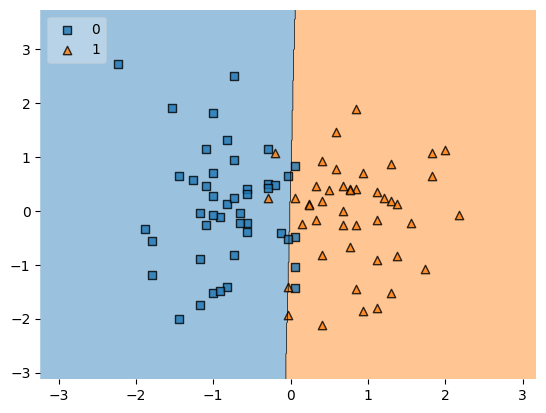

In [40]:
plot_decision_regions(X=X_train,y=Y_train.values,clf=clf,legend=2)

In [41]:
import pickle

In [42]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')